In [ ]:
Основы статистики.
Доверительные
интервалы

In [ ]:
Доверительные интервалы (ДИ) - это фундаментальное
понятие в статистике, представляющее собой диапазон,
в котором, как мы ожидаем, будет находиться параметр
генеральной совокупности (например, среднее значение
или доля) на основе данных выборки.

In [ ]:
95% -- 0.95 
справа и слева по 0.025
правая граница 0.975
Z-score правой границы 1.96
доверительный интервал 
0 +- 1.96 -- 95% доверительный интервал

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Есть студенты, часть сдала экзамен, часть нет
# есть выборка из 30 студентов, 20 сдало

# 1.96 -- по Z-таблице для 95% (см. выше)
print(20/30) # вероятность успеха на выборке
print(20/30 + 1.96*np.sqrt((20/30 * 10/30)/30)) # правая граница доверительного интервала для вероянтности генеральной совокупности (всех сутдентов)
print(20/30 - 1.96*np.sqrt((20/30 * 10/30)/30)) # левая ...

0.6666666666666666
0.8353566079681453
0.497976725365188


In [15]:
# Генерируем выборку
np.random.seed(0) # Для воспроизводимости
data = np.random.normal(loc=100, scale=15, size=50) # loc=mean, scale=std,size=размер выборки
data

array([126.46078519, 106.00235813, 114.68106976, 133.61339799,
       128.01336985,  85.3408318 , 114.25132626,  97.72964188,
        98.45171722, 106.15897753, 102.16065357, 121.8141026 ,
       111.41556588, 101.82512525, 106.65794849, 105.00511491,
       122.4111861 ,  96.92262604, 104.69601552,  87.18856391,
        61.70515276, 109.80427893, 112.96654298,  88.86752469,
       134.04631936,  78.18451488, 100.68637776,  97.19224225,
       122.99168822, 122.04038155, 102.32421139, 105.67243779,
        86.68321379,  70.28805298,  94.78131776, 102.34523454,
       118.45436021, 118.03569773,  94.19009774,  95.46545874,
        84.27170552,  78.69973094,  74.40594714, 129.26163093,
        92.35521727,  93.42888548,  81.2080696 , 111.66235534,
        75.79153229,  96.8088958 ])

In [14]:
# Рассчитайте среднее значение и стандартную ошибку среднего
mean = np.mean(data)
sem = st.sem(data) # Стандартная ошибка среднего
# Определите доверительный интервал
confidence = 0.95
# Вычислить доверительный интервал
ci = st.t.interval(confidence=confidence, df=len(data)-1, loc=mean, scale=sem) # t - интервал для маленьких выдорок до 30, когда выборка больше, то используем norm
print(mean, sem)
print(f"95% доверительный интервал (с использованием t-распределения): {ci}")

102.10838908469648 2.411834829760384
95% доверительный интервал (с использованием t-распределения): (np.float64(97.26162553476419), np.float64(106.95515263462877))


In [19]:
# Для больших наборов данных мы можем использовать нормальное распределение
ci_large = st.norm.interval(confidence=confidence, loc=mean, scale=sem)
print(f"95% доверительный интервал (с использованием нормального распределения): {ci_large}")

95% доверительный интервал (с использованием нормального распределения): (np.float64(97.38127968170684), np.float64(106.83549848768612))


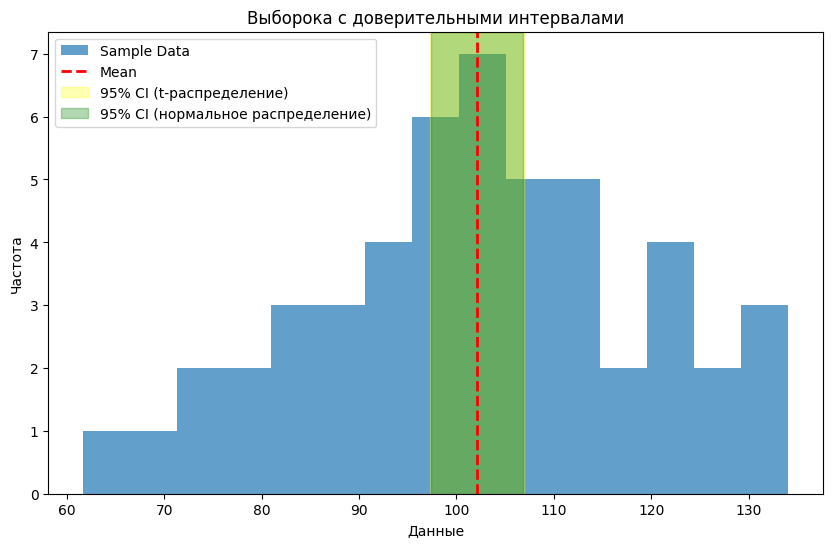

In [22]:
# Построение графика данных выборки
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.7, label='Sample Data')
# Построение графика среднего значения
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
# Выделение доверительного интервала
plt.axvspan(ci[0], ci[1], color='yellow', alpha=0.3, label='95% CI (t-распределение)')
plt.axvspan(ci_large[0], ci_large[1], color='green', alpha=0.3, label='95% CI (нормальное распределение)')
plt.xlabel('Данные')
plt.ylabel('Частота')
plt.title('Выборока с доверительными интервалами')
plt.legend()
plt.show()

In [ ]:
1. Учитывая выборку из 50 растений со средней высотой выборки 19.24 дюйма и известным стандартным
отклонением популяции в 10 дюймов, рассчитайте 95% доверительный интервал для средней высоты
популяции.


ЦПТ: среднее выборок из 50 элементов (большое, например, больше 30)
-- нормально распределены
-- среднее = среднее ген совокупности
-- ст.откл = (ст откл ген совокупности) / (корень из размера выборок 50)

Доверительный интервал: 
1) берем все выборки из 50 элементов, 
2) строим по ним доверит интервалы,
3) 95% из них содержат среднее всей ген совокупности

In [1]:
import numpy as np
import scipy.stats as st


sample_mean = 19.24
population_std = 10
sample_size = 50
confidence_level = 0.95

z_critical = st.norm.ppf((1 + confidence_level) / 2) # перцентиль 0.975 -- расстояние от центра
margin_of_error = z_critical * (population_std / np.sqrt(sample_size)) # z-score * SEM

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (16.47, 22.01)


In [ ]:
2. Учитывая выборку из 15 растений со средней высотой выборки 20.4 дюйма, рассчитайте 99%-ный
доверительный интервал для средней высоты популяции, используя t-распределение.


In [4]:
sample_mean = 20.4
sample_std = 5
sample_size = 15
confidence_level = 0.99

t_critical = st.t.ppf((1 + confidence_level) / 2, df=sample_size-1) # если предполагаем что данные распределены нормально
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"99% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

99% Confidence Interval: (16.56, 24.24)


In [5]:
sample_mean = 20.4
sample_std = 5
sample_size = 15
confidence_level = 0.99

t_critical = st.norm.ppf((1 + confidence_level) / 2, df=sample_size-1) # если не знаем, распределены ли данные нормально
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"99% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

TypeError: _parse_args() got an unexpected keyword argument 'df'

In [ ]:
3. Учитывая данные выборки случайных целых чисел от 10 до 30 размером 50, рассчитайте и сравните
доверительные интервалы 95% и 99%.

In [7]:
import numpy as np
import scipy.stats as st
np.random.seed(0)
data = np.random.randint(10, 30, 50)
sample_mean = np.mean(data)
sem = st.sem(data) # стандартная ошибка
std = np.std(data) # стандартное отклонение
print(sem, std, std/np.sqrt(50-1)) # связано со степенями свободы -1

ci_95 = st.norm.interval(confidence=0.95, loc=sample_mean, scale=sem)

ci_99 = st.norm.interval(confidence=0.99, loc=sample_mean, scale=sem)

print(f"95% Confidence Interval: {ci_95}")
print(f"99% Confidence Interval: {ci_99}")

0.9387616680434684 6.571331676304279 0.9293266379481436
95% Confidence Interval: (np.float64(17.400060940568054), np.float64(21.079939059431943))
99% Confidence Interval: (np.float64(16.821910186405187), np.float64(21.65808981359481))


In [ ]:
Практикум

In [ ]:
Продемонстрируйте влияние размера выборки на форму распределения средних, используя экспоненциальное распределение.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Параметры генеральной совокупности
lambda_ = 2
mu = 1/lambda_
sigma = 1/lambda_

# sample_size - это размер выборки 
# num_samples - это количество выборок

# Функция для генерации случайных выборок и вычисления выборочных средних
def generate_sample_means(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.exponential(1/lambda_, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

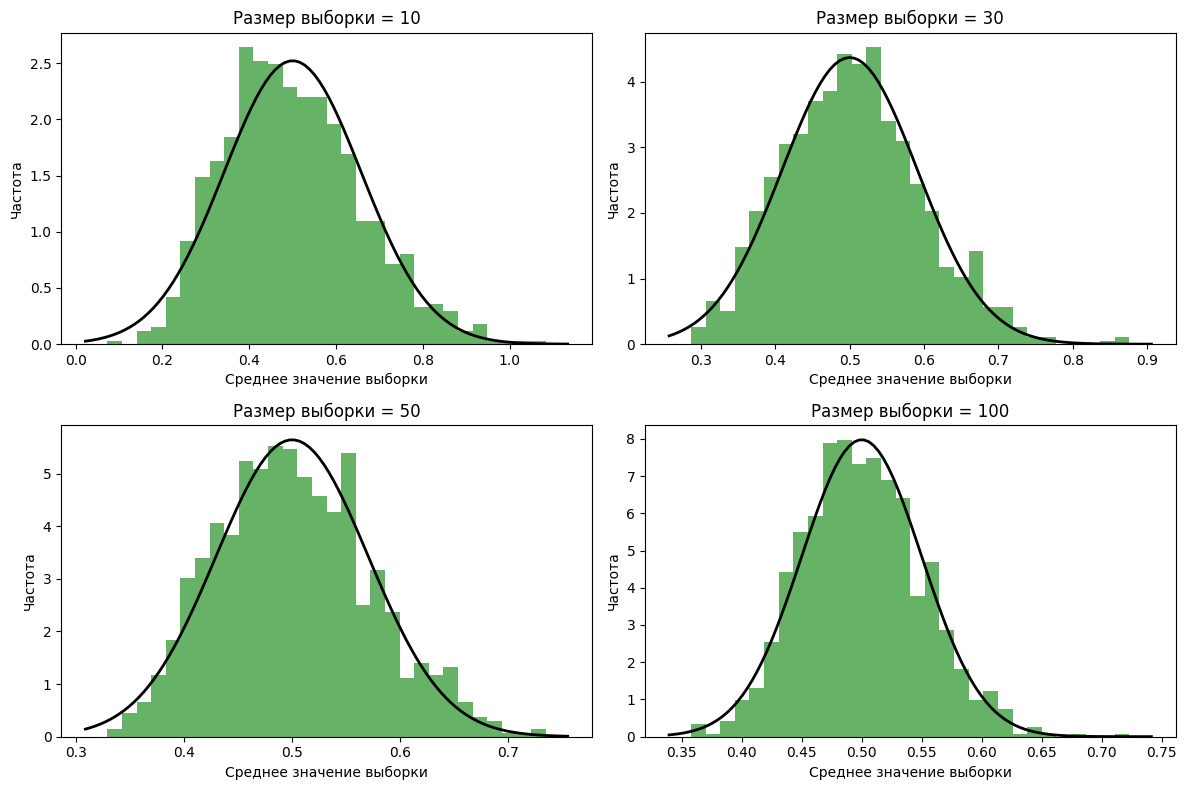

In [16]:
# Параметры для моделирования
sample_sizes = [10, 30, 50, 100]
num_samples = 1000

# Построение графиков выборочных распределений
plt.figure(figsize=(12, 8))

# для каждого размера выборки 
for i, sample_size in enumerate(sample_sizes):
    # берем выборку 1000 раз и находим их средние
    sample_means = generate_sample_means(sample_size, num_samples)
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Размер выборки = {sample_size}')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Частота')
    # Постройте график нормального распределения для сравнения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma/np.sqrt(sample_size))
    plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

In [22]:
std = 200
mean = 1000
sample = 50

sem = std/np.sqrt(sample)
left_p = stats.norm.cdf((950 - 1000)/sem)
right_p = stats.norm.cdf((1050 - 1000)/sem)
res = right_p - left_p

print(f'Среднее время жизни в выборке находится в диапазоне от 950 до 1050 часов с вероятностью: {res*100:.0f}%')

Среднее время жизни в выборке находится в диапазоне от 950 до 1050 часов с вероятностью: 92%


In [ ]:
Рассчитайте и визуализируйте 95% доверительный интервал для среднего значения популяции, используя малые
размеры выборки (n < 30) из известной популяции.
Инструкции:
- Создайте нормально распределенную совокупность из 5 000 точек данных со средним значением 50 и
стандартным отклонением 10.
- Произведите случайную выборку 25 точек данных из этой совокупности.
- Рассчитайте 95 %-ный доверительный интервал для среднего значения популяции по этой выборке, используя tраспределение.
- Нанесите на график данные выборки, среднее значение популяции и границы доверительного интервала.

46.59, 53.73


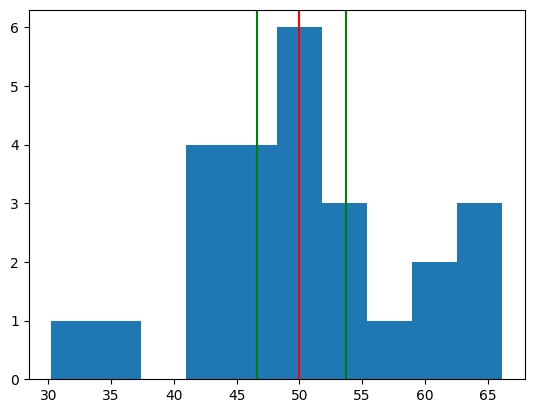

In [32]:
import matplotlib.pyplot as plt

np.random.seed(42)
mean = 50 
std = 10
size = 5000

population = np.random.normal(loc=mean, scale=std, size=size)
sample = np.random.choice(population, size=25, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
confidential_level = 0.95

t_critical = st.t.ppf((1+confidential_level)/2, 25-1)
margin_of_error = t_critical*(sample_std/np.sqrt(25))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f'{ci_lower:.2f}, {ci_upper:.2f}')

plt.hist(sample);
plt.axvline(mean, color='red')
plt.axvline(ci_lower, color='green')
plt.axvline(ci_upper, color='green')

In [ ]:
Проиллюстрируйте, как меняется ширина доверительных интервалов при разных объемах выборки.
Инструкции:
- Используя ту же совокупность, что и в задании 2, постройте три выборки разного размера (n=15, n=30, n=60).
- Рассчитайте 95%-ный доверительный интервал для среднего значения популяции по каждой выборке.
- Сравните ширину трех доверительных интервалов.
- Нанесите результаты на график, показав, как сужается доверительный интервал при увеличении размера
выборки.

In [34]:
std = 200
sample_mean = 1000
size = 15
sem = std / np.sqrt(size)

confidential_level = 0.95
t_critical = st.t.ppf((1+confidential_level)/2, size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"({ci_lower},{ci_upper})")

(995.2102001205552,1004.7897998794448)


In [35]:
std = 200
sample_mean = 1000
size = 30
sem = std / np.sqrt(size)

confidential_level = 0.95
t_critical = st.t.ppf((1+confidential_level)/2, size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"({ci_lower},{ci_upper})")

(996.7703136804188,1003.2296863195812)


In [36]:
std = 200
sample_mean = 1000
size = 60
sem = std / np.sqrt(size)

confidential_level = 0.95
t_critical = st.t.ppf((1+confidential_level)/2, size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"({ci_lower},{ci_upper})")

(997.7656595234547,1002.2343404765453)


In [ ]:
Продемонстрируйте, как изменение доверительного уровня влияет на ширину доверительных интервалов для среднего значения популяции.
Инструкции:
Создайте совокупность из 1000 нормально распределенных точек данных со средним значением 100 и стандартным отклонением 20.
Сделайте выборку из 50 точек данных из этой популяции.
Рассчитайте и постройте доверительные интервалы для среднего значения популяции при трех различных уровнях доверия: 90 %, 95 % и 99 %.
Используйте Matplotlib или Seaborn для визуализации среднего значения выборки, среднего значения популяции и трех наборов границ доверительных интервалов на одном графике.
Проанализируйте, как меняется ширина доверительного интервала в зависимости от уровня доверия, и обсудите компромиссы.

(95.23,101.73,108.22)


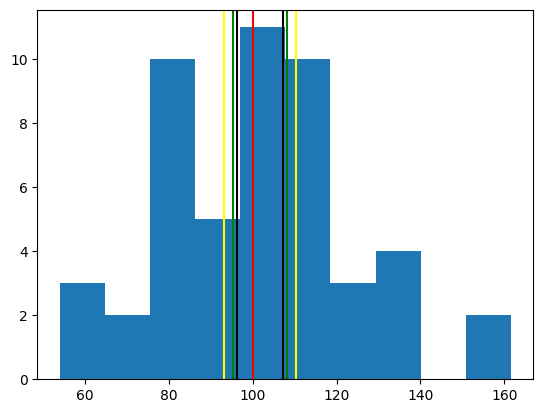

In [37]:
import numpy as np
np.random.seed(42)
mean = 100
std = 20
size = 1000
sample_size = 50

population = np.random.normal(loc=mean, scale=std, size=size)
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
confidential_level = 0.95
t_critical = stats.t.ppf((1+confidential_level)/2, sample_size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(sample_size))

ci_lower = sample_mean - margin_of_error  
ci_upper = sample_mean + margin_of_error 

confidential_level = 0.90
t_critical = stats.t.ppf((1+confidential_level)/2, sample_size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(sample_size))

ci_lower_90 = sample_mean - margin_of_error  
ci_upper_90 = sample_mean + margin_of_error 

confidential_level = 0.99
t_critical = stats.t.ppf((1+confidential_level)/2, sample_size-1)

margin_of_error = t_critical * (sample_std/np.sqrt(sample_size))

ci_lower_99 = sample_mean - margin_of_error  
ci_upper_99 = sample_mean + margin_of_error  

print(f"({ci_lower:.2f},{sample_mean:.2f},{ci_upper:.2f})")

plt.hist(sample)
plt.axvline(mean, color='red')
plt.axvline(ci_lower, color='green')
plt.axvline(ci_upper, color='green')
plt.axvline(ci_lower_90, color='black')
plt.axvline(ci_upper_90, color='black')
plt.axvline(ci_lower_99, color='yellow')
plt.axvline(ci_upper_99, color='yellow')